In [1]:
from mltoolbox.basic import *

In [2]:
plt.rcParams['figure.figsize'] = [15.0, 6.0]

In [3]:
subset = pd.read_pickle('data/subset_train')

In [4]:
subset.head()

,15,16,17,30,31,32,201,202,203,285,...,296,378,379,380,408,409,410,8691,8692,8693
0,-8,17,-10,13,-2,-17,-22,14,8,-11,...,-6,0,17,-17,-20,6,12,-1,-3,-3
1,-7,17,-10,14,-3,-18,-23,13,6,-12,...,-6,-2,16,-18,-20,6,13,0,-1,-2
2,-9,16,-11,11,-3,-18,-24,11,5,-11,...,-7,-1,17,-17,-19,6,12,1,-1,-1
3,-7,18,-9,14,-3,-17,-21,15,8,-11,...,-6,0,17,-17,-19,7,13,1,-1,-2
4,-9,16,-11,14,-3,-18,-25,11,5,-9,...,-6,-1,17,-18,-19,6,14,-1,-2,-2


In [5]:
train_meta = pd.read_csv('data/metadata_train.csv')

In [6]:
train_meta.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [7]:
t = [int(i) for i in subset.columns.values]
train_meta = train_meta[train_meta.signal_id.apply(lambda x: x in t)]

In [8]:
display_all(train_meta.T)

,15,16,17,30,31,32,201,202,203,285,286,287,288,289,290,294,295,296,378,379,380,408,409,410,8691,8692,8693
signal_id,15,16,17,30,31,32,201,202,203,285,286,287,288,289,290,294,295,296,378,379,380,408,409,410,8691,8692,8693
id_measurement,5,5,5,10,10,10,67,67,67,95,95,95,96,96,96,98,98,98,126,126,126,136,136,136,2897,2897,2897
phase,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2
target,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,0


# 3 Phase plots

In [9]:
SAMPLE_LENGTH = 800000
SAMPLE_TIME = 20e-3     # in second

In [10]:
from scipy.fftpack import rfft, irfft, rfftfreq

In [11]:
def filter_signal(signal, threshold=1e6):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=SAMPLE_TIME/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [12]:
def sig_replicate(signal, rep=1):
    return np.concatenate([signal for i in range(rep)])

In [13]:
def plot_3phase(measurement_id, replicate=1, filterd=False, threshold=1e5):
    r_id = train_meta.query(f'phase == 0 and id_measurement == {measurement_id}'
                           )['signal_id'].values[0]
    y_id = train_meta.query(f'phase == 1 and id_measurement == {measurement_id}'
                           )['signal_id'].values[0]
    b_id = train_meta.query(f'phase == 2 and id_measurement == {measurement_id}'
                           )['signal_id'].values[0]
    r_data = sig_replicate(subset.loc[:, str(r_id)], replicate)
    y_data = sig_replicate(subset.loc[:, str(y_id)], replicate)
    b_data = sig_replicate(subset.loc[:, str(b_id)], replicate)
    plt.plot(r_data, c='r')
    plt.plot(y_data, c='y')
    plt.plot(b_data, c='b')
    if filterd:
        plt.plot(filter_signal(r_data, threshold), c='k')
        plt.plot(filter_signal(y_data, threshold), c='k')
        plt.plot(filter_signal(b_data, threshold), c='k')
    return None

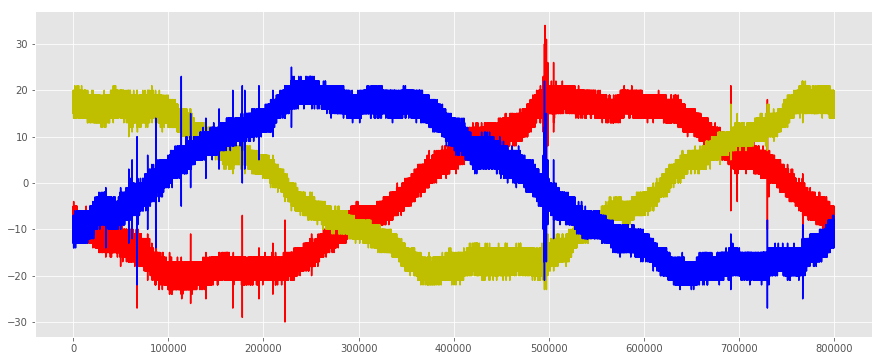

In [14]:
plot_3phase(5)

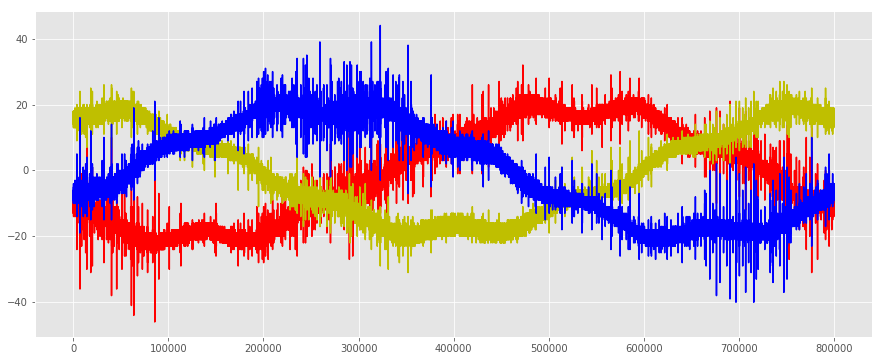

In [15]:
plot_3phase(95)

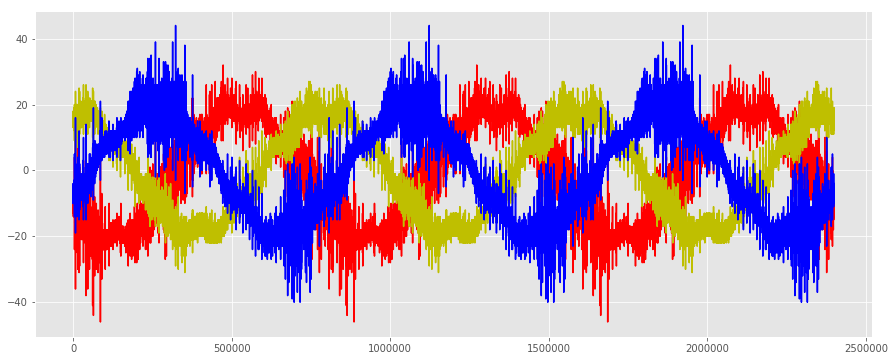

In [16]:
plot_3phase(95, replicate=3)

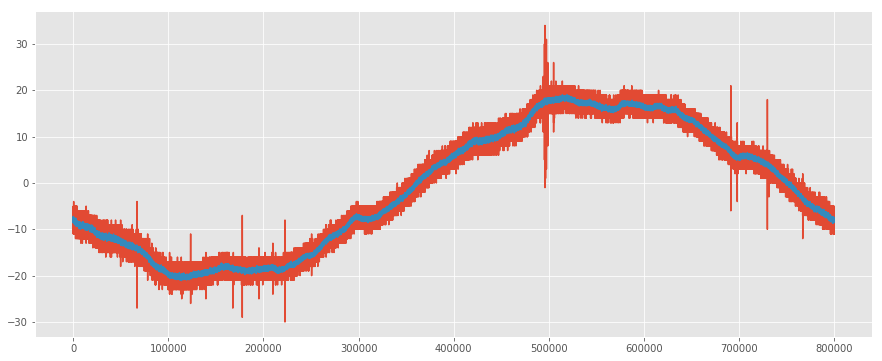

In [17]:
plt.plot(subset.loc[:, '15'].values)
plt.plot(filter_signal(subset.loc[:, '15'].values))

Looking at the joinings
--------------------------------

(13, 18)

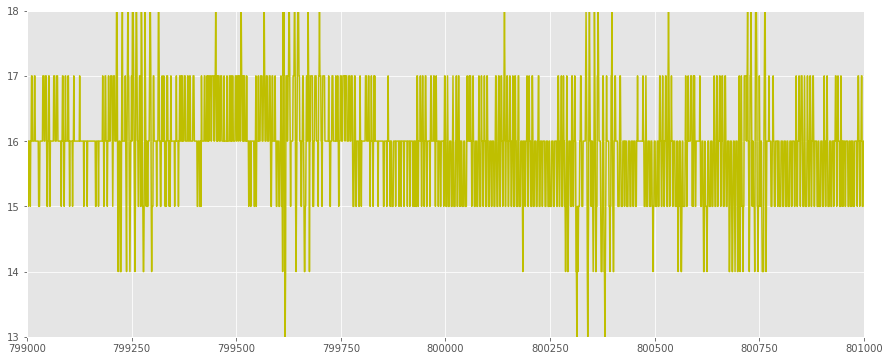

In [18]:
plot_3phase(95, replicate=3)
plt.xlim([SAMPLE_LENGTH - 1000, SAMPLE_LENGTH + 1000])
plt.ylim([13, 18])

(13, 18)

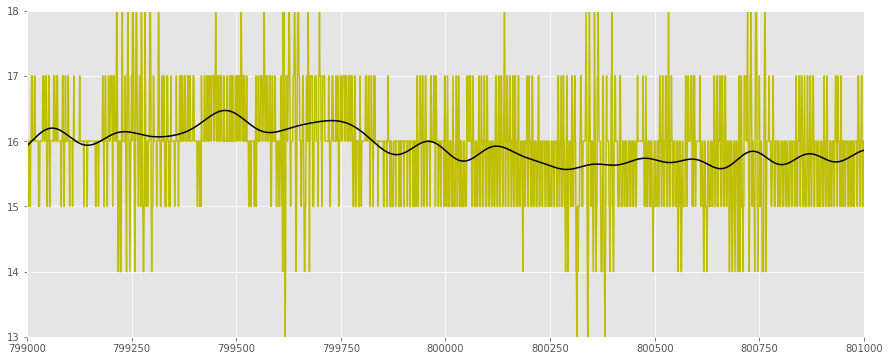

In [19]:
plot_3phase(95, replicate=3, filterd=True, threshold=1e6)
plt.xlim([SAMPLE_LENGTH - 1000, SAMPLE_LENGTH + 1000])
plt.ylim([13, 18])

(13, 18)

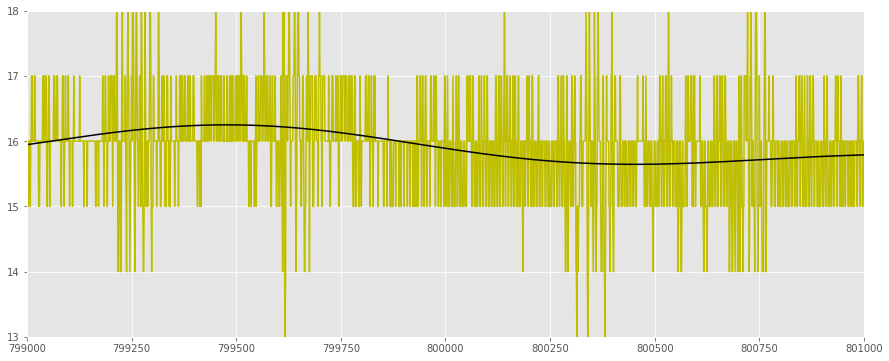

In [20]:
plot_3phase(95, replicate=3, filterd=True, threshold=1e5)
plt.xlim([SAMPLE_LENGTH - 1000, SAMPLE_LENGTH + 1000])
plt.ylim([13, 18])

looks like joining might not be a problem

In [21]:
import math

In [22]:
def shift_sig(signal, shift_deg=120):
    shift_idx = math.floor(abs(shift_deg * (SAMPLE_LENGTH / 360)))
    if shift_deg > 0:
        return np.concatenate([np.zeros(shift_idx), signal])
    else:
        return signal[shift_idx:]

In [23]:
r_id = 15
y_id = 16
b_id = 17

In [24]:
signal_r = sig_replicate(subset.loc[:, str(r_id)], rep=6)
signal_y = sig_replicate(subset.loc[:, str(y_id)], rep=6)
signal_b = sig_replicate(subset.loc[:, str(b_id)], rep=6)

Forward shift by 120 degree

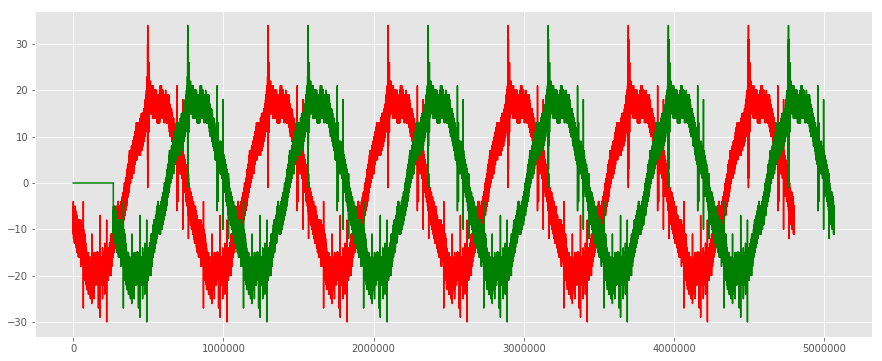

In [25]:
plt.plot(signal_r, c='r')
plt.plot(shift_sig(signal_r, shift_deg=120), c='g')

backward shift by 120 degree

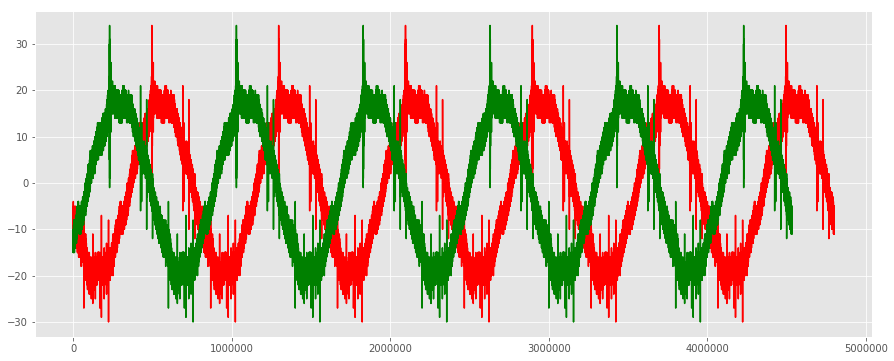

In [26]:
plt.plot(signal_r, c='r')
plt.plot(shift_sig(signal_r, shift_deg=-120), c='g')

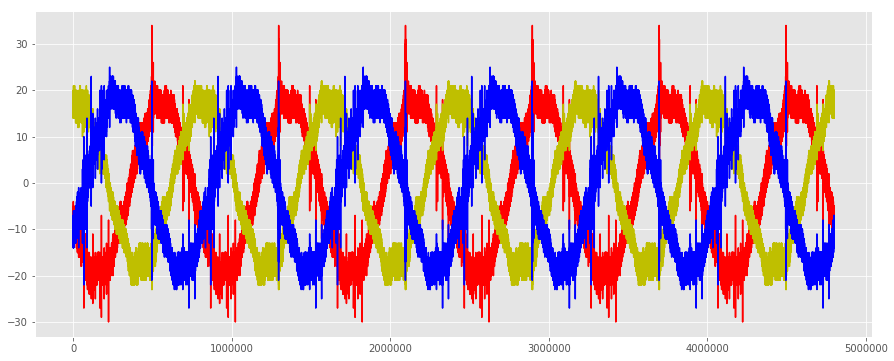

In [27]:
plt.plot(signal_r, c='r')
plt.plot(signal_y, c='y')
plt.plot(signal_b, c='b')

# Positive Sequence Voltage

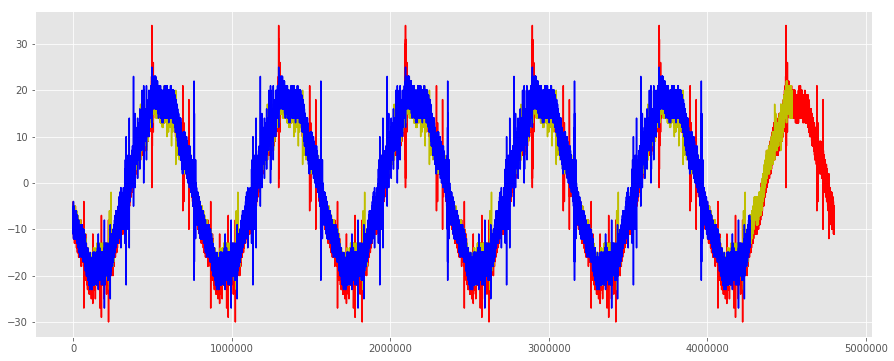

In [28]:
plt.plot(signal_r, c='r')
plt.plot(shift_sig(signal_y, shift_deg=-120), c='y')
plt.plot(shift_sig(signal_b, shift_deg=-240), c='b')

# Negative Sequence Voltage

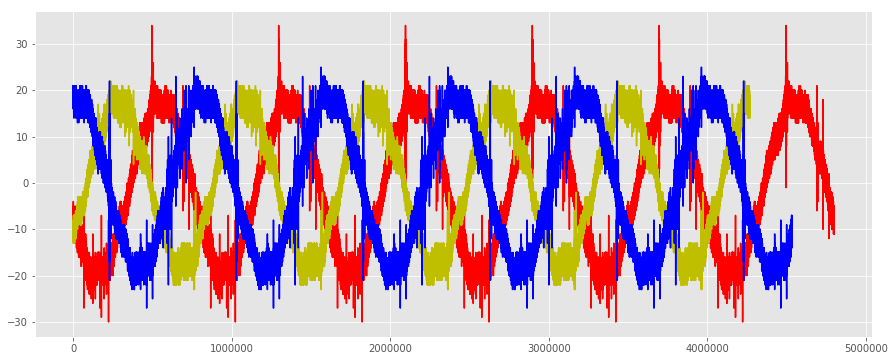

In [29]:
plt.plot(signal_r, c='r')
plt.plot(shift_sig(signal_y, shift_deg=-240), c='y')
plt.plot(shift_sig(signal_b, shift_deg=-120), c='b')

# Zero Sequence Voltage

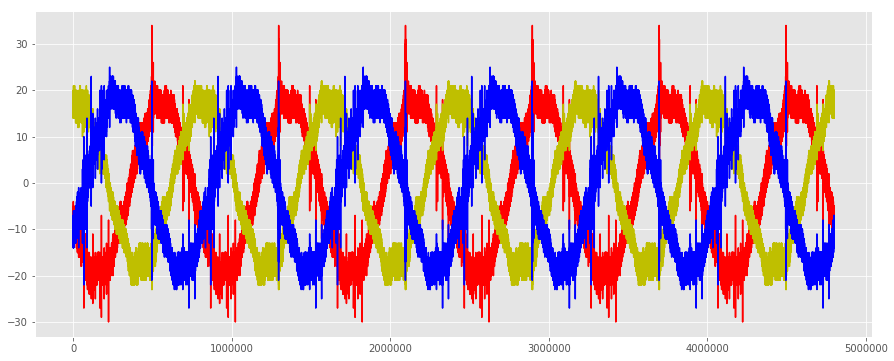

In [30]:
plt.plot(signal_r, c='r')
plt.plot(signal_y, c='y')
plt.plot(signal_b, c='b')

In [31]:
def get_sequence_components(measurement_id):
    r_id = train_meta.query(f'phase == 0 and id_measurement == {measurement_id}'
                           )['signal_id'].values[0]
    y_id = train_meta.query(f'phase == 1 and id_measurement == {measurement_id}'
                           )['signal_id'].values[0]
    b_id = train_meta.query(f'phase == 2 and id_measurement == {measurement_id}'
                           )['signal_id'].values[0]
    
    r_data = subset.loc[:, str(r_id)]
    y_data = subset.loc[:, str(y_id)]
    b_data = subset.loc[:, str(b_id)]
    
    r_rep = sig_replicate(r_data, 2)
    y_rep = sig_replicate(y_data, 2)
    b_rep = sig_replicate(b_data, 2)
    
    # Positive sequence
    r_p = r_rep[:SAMPLE_LENGTH]
    y_p = shift_sig(signal_y, shift_deg=-120)[:SAMPLE_LENGTH]
    b_p = shift_sig(signal_b, shift_deg=-240)[:SAMPLE_LENGTH]    
    pos = np.mean(np.vstack([r_p, y_p, b_p]), axis=0)
    
    # Negative sequence
    r_n = r_rep[:SAMPLE_LENGTH]
    y_n = shift_sig(signal_y, shift_deg=-240)[:SAMPLE_LENGTH]
    b_n = shift_sig(signal_b, shift_deg=-120)[:SAMPLE_LENGTH]
    neg = np.mean(np.vstack([r_n, y_n, b_n]), axis=0)
    
    # Zero sequence
    zero = np.mean(np.vstack([r_data, y_data, b_data]), axis=0)
    
    return pos, neg, zero

In [32]:
pos, neg, zero = get_sequence_components(5)

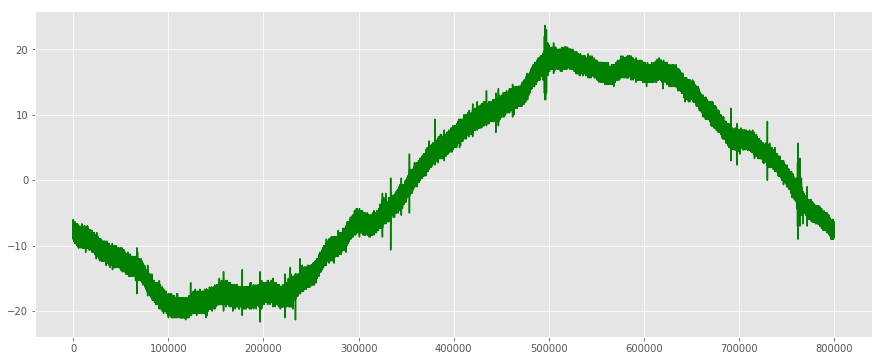

In [33]:
plt.plot(pos, c='g')

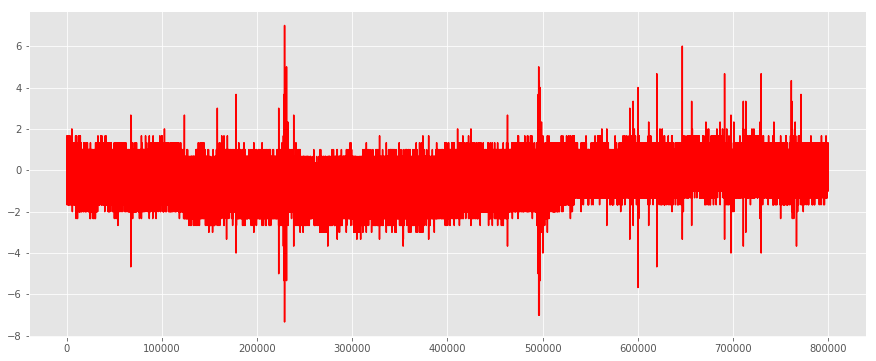

In [34]:
plt.plot(neg, c='r')

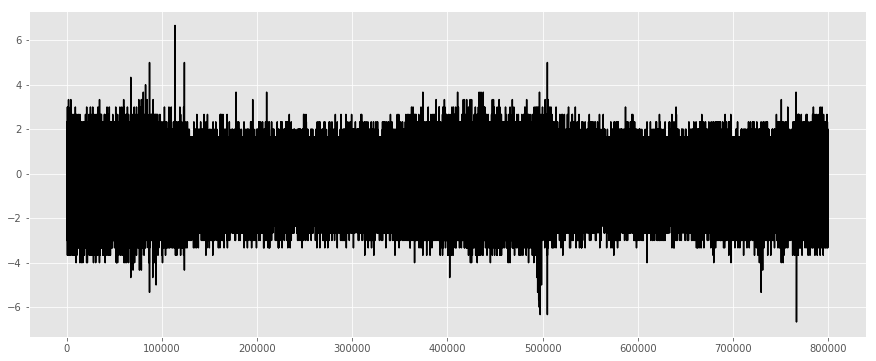

In [35]:
plt.plot(zero, c='k')

# Spectrograms

In [10]:
r_data = subset.loc[:, '15']
y_data = subset.loc[:, '15']
b_data = subset.loc[:, '15']

In [11]:
SAMPLING_RATE = SAMPLE_LENGTH / SAMPLE_TIME

In [12]:
from scipy import signal

Text(0.5,0,'Time [sec]')

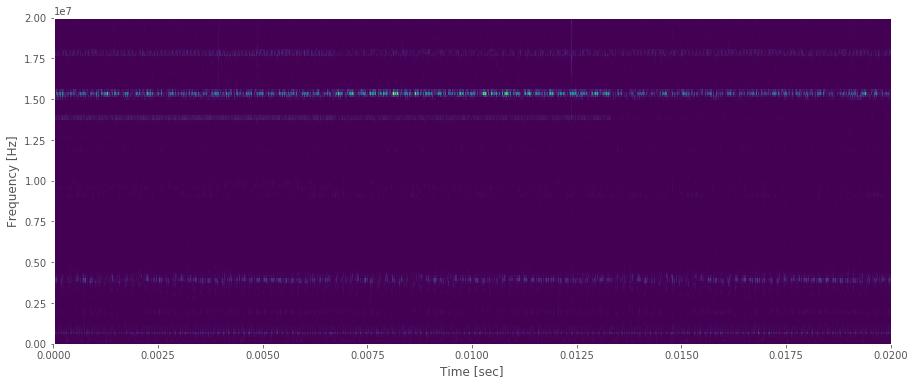

In [39]:
f, t, Sxx = signal.spectrogram(x=pos, fs=SAMPLING_RATE,
                               window='hamming')

plt.pcolormesh(t, f, Sxx)
#plt.semilogy()
#plt.ylim([0.1, 20000001])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Text(0.5,0,'Time [sec]')

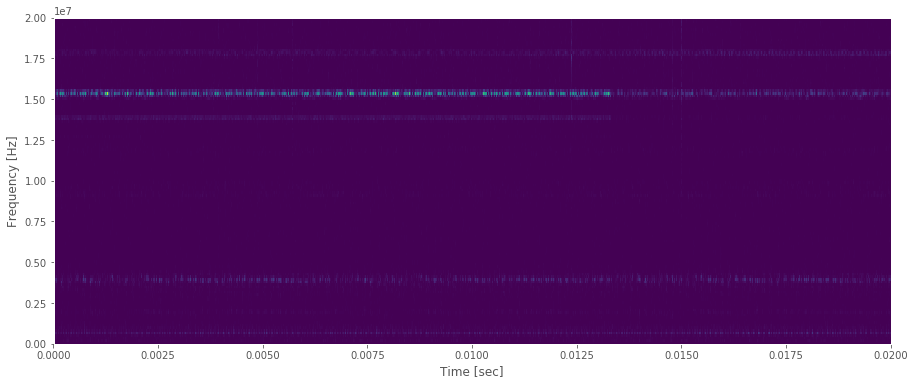

In [40]:
f, t, Sxx = signal.spectrogram(x=neg, fs=SAMPLING_RATE,
                               window='hamming')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Text(0.5,0,'Time [sec]')

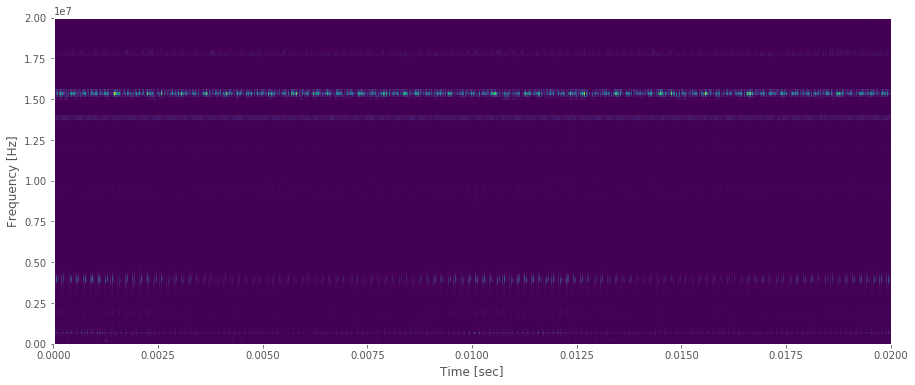

In [41]:
f, t, Sxx = signal.spectrogram(x=zero, fs=SAMPLING_RATE,
                               window='hamming')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [42]:
print(f.shape, t.shape, Sxx.shape)

(129,) (3571,) (129, 3571)


In [43]:
print(f"Sampling Frequencey :{SAMPLING_RATE / 1e6} MHz")

Sampling Frequencey :40.0 MHz


In [44]:
Sxx.min()

4.656003186475258e-17

The above needs tuning .... will come back.

In [45]:
import seaborn as sns

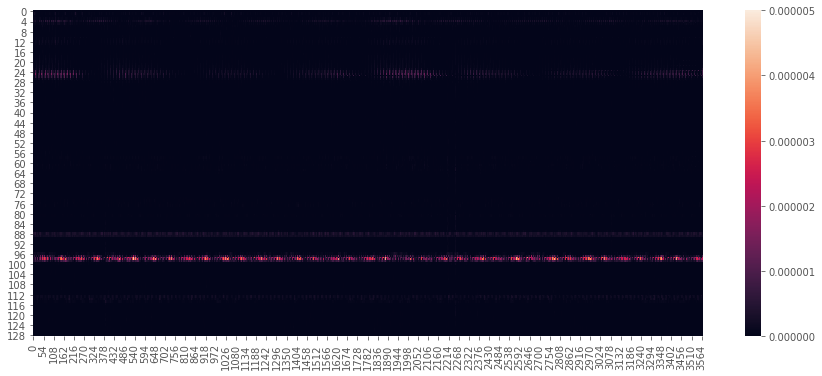

In [46]:
f, t, Sxx = signal.spectrogram(x=zero, fs=SAMPLING_RATE,
                               window='hamming')
sns.heatmap(Sxx)

In [47]:
from matplotlib.colors import LogNorm

In [48]:
import warnings
warnings.simplefilter('ignore')

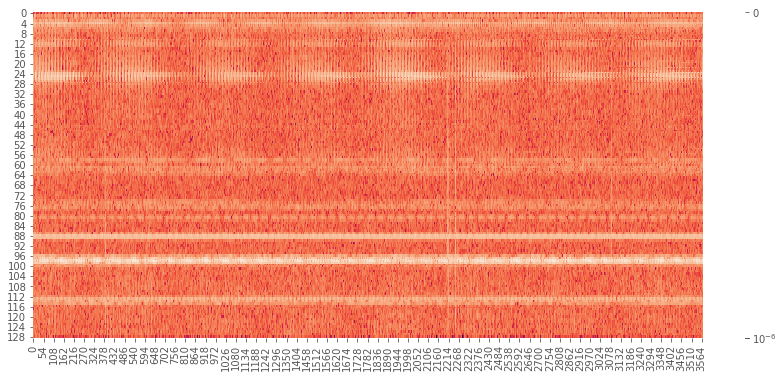

In [49]:
f, t, Sxx = signal.spectrogram(x=zero, fs=SAMPLING_RATE,
                               window='hamming')
sns.heatmap(Sxx, norm=LogNorm(Sxx.min(), Sxx.max()))

In [50]:
plt.rcParams['figure.figsize'] = [15.0, 10.0]

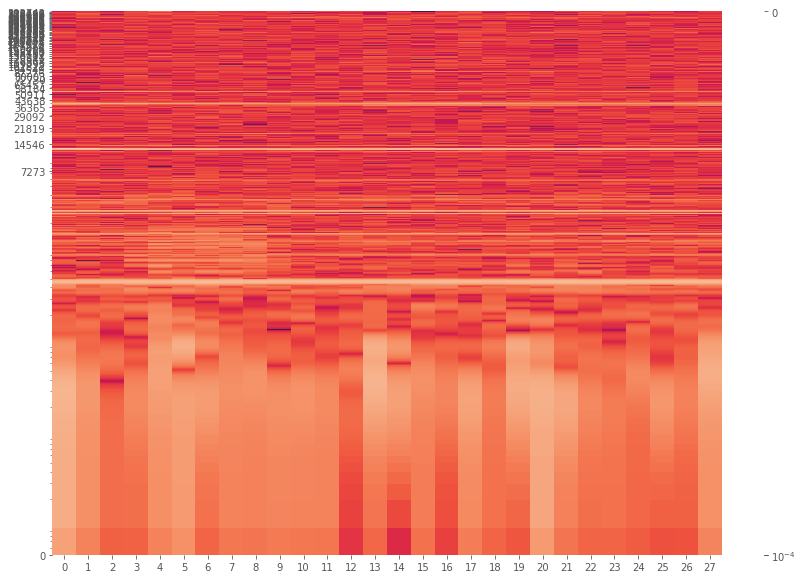

In [51]:
f, t, Sxx = signal.spectrogram(x=zero, fs=SAMPLING_RATE,
                               window='hamming', nperseg=32000,
                               nfft=SAMPLE_LENGTH)
plt.semilogy()
sns.heatmap(Sxx, norm=LogNorm(Sxx.min(), Sxx.max()))

In [52]:
f

array([0.000000e+00, 5.000000e+01, 1.000000e+02, ..., 1.999990e+07,
       1.999995e+07, 2.000000e+07])

In [53]:
f, t, Sxx = signal.spectrogram(x=r_data, fs=SAMPLING_RATE,
                               window='hamming', nperseg=50000,
                               nfft=SAMPLE_LENGTH)

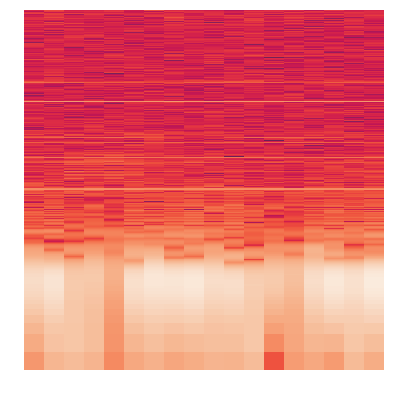

In [54]:
fig, ax = plt.subplots(1)
fig.set_size_inches(5, 5)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.axis('off')
plt.semilogy()
sns.heatmap(Sxx, norm=LogNorm(Sxx.min(), Sxx.max()), cbar=False)
fig.savefig('test.jpg', dpi=100, frameon='false')

In [55]:
def save_spectrogram(data, fpath, log_col=False, log_freq=False):
    plt.ioff()
    fig, ax = plt.subplots(1)
    fig.set_size_inches(5, 5)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis('off')
    if log_freq:
        plt.semilogy()
    if log_col:
        sns.heatmap(data, norm=LogNorm(data.min(), data.max()), cbar=False)
    else:
        sns.heatmap(data, cbar=False)
    fig.savefig(fpath, dpi=100, frameon='false')
    plt.close(fig)
    return True

In [56]:
save_spectrogram(Sxx, 'check_fun.jpg', log_col=True, log_freq=True)

True

In [57]:
for i in [100, 250, 500, 1000, 2000]:
    f, t, Sxx = signal.spectrogram(x=zero, fs=SAMPLING_RATE, nperseg=i)
    print(t.shape, f.shape, t.shape[0] * f.shape[0])

(9090,) (51,) 463590
(3652,) (126,) 460152
(1826,) (251,) 458326
(914,) (501,) 457914
(457,) (1001,) 457457


In [58]:
SAMPLING_RATE

40000000.0

In [59]:
MAX_FREQUENCY = SAMPLING_RATE / 2

In [60]:
def get_freq_res(n_seg):
    n_fft_bins = n_seg / 2
    freq_res = MAX_FREQUENCY / n_fft_bins
    return freq_res

In [61]:
get_freq_res(50000)

800.0

What if we use nfft length - with zero pading

In [62]:
get_freq_res(SAMPLE_LENGTH)

50.0

In [63]:
SAMPLE_LENGTH / 32000

25.0

In [64]:
f, t, Sxx = signal.spectrogram(x=zero, fs=SAMPLING_RATE, nperseg=i)

# Flatrion

In [65]:
from numba import jit, int32

In [66]:
@jit('float32(float32[:,:], int32, int32)')
def flatiron(x, alpha=100., beta=1):
    new_x = np.zeros_like(x)
    zero = x[0]
    for i in range(1, len(x)):
        zero = zero*(alpha-beta)/alpha + beta*x[i]/alpha
        new_x[i] = x[i] - zero
    return new_x

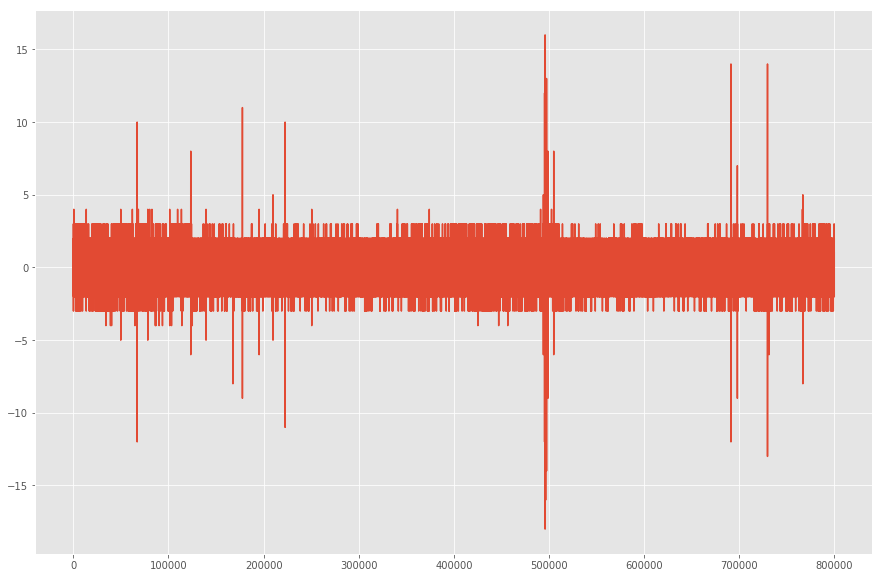

In [67]:
plt.plot(flatiron(r_data))

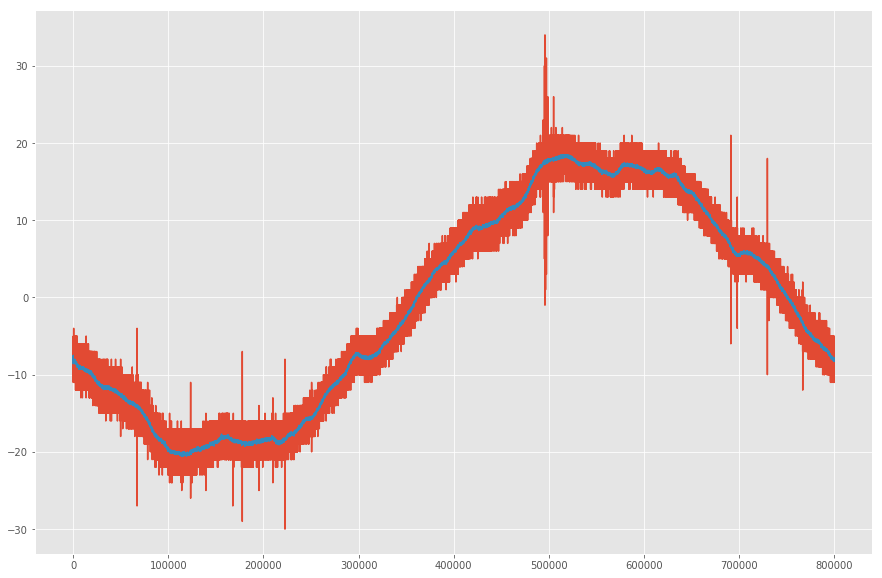

In [68]:
plt.plot(r_data)
plt.plot(r_data.ewm(alpha=0.01).mean())
# plt.xlim([0, 50])

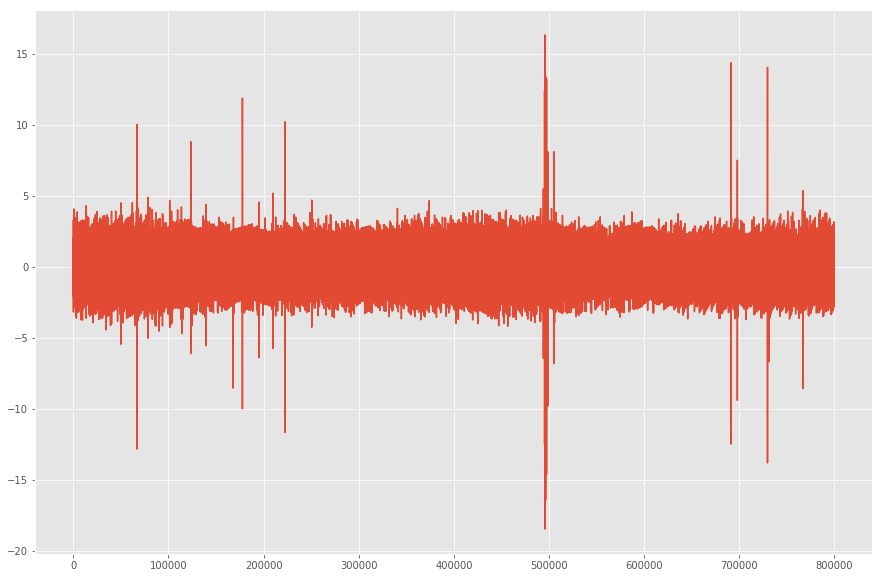

In [69]:
plt.plot(r_data - r_data.ewm(alpha=0.01).mean())

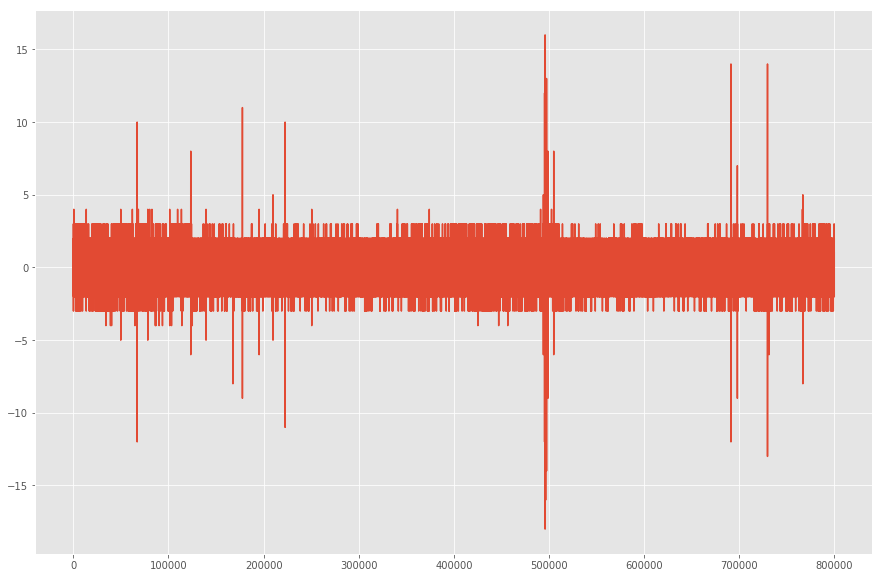

In [70]:
plt.plot(flatiron(r_data))

In [71]:
def feature_extractor(x, n_part=1000):
    lenght = len(x)
    pool = np.int32(np.ceil(lenght/n_part))
    output = np.zeros((n_part, 3))
    for j, i in enumerate(range(0, lenght, pool)):
        if i+pool < lenght:
            k = x[i:i+pool]
        else:
            k = x[i:]
        output[j] = np.max(k, axis=0) - np.min(k, axis=0)
    return output

In [72]:
f_r_data = feature_extractor(r_data)

In [73]:
f_r_data

array([[7., 7., 7.],
       [5., 5., 5.],
       [6., 6., 6.],
       ...,
       [6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]])

In [74]:
import seaborn as sns

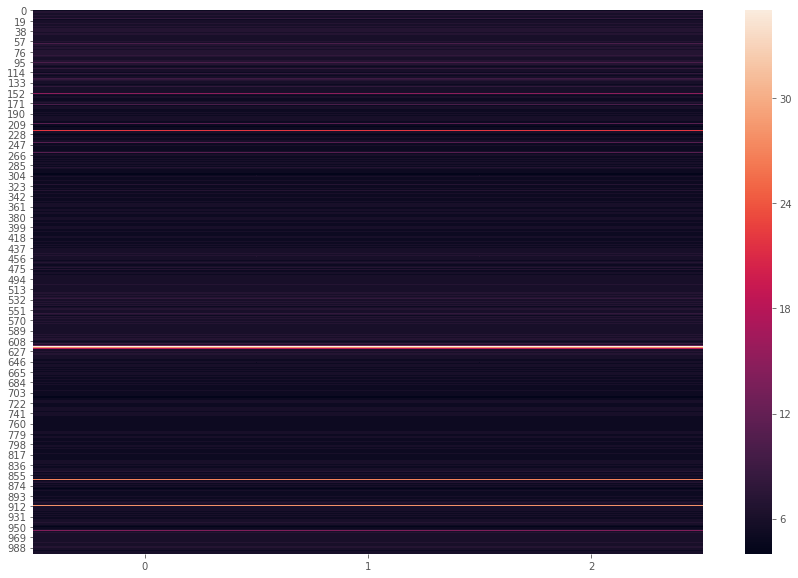

In [75]:
sns.heatmap(f_r_data)

# Simple FFT

In [76]:
r_data_fft = rfft(r_data)
power = np.abs(r_data_fft)
r_freq = rfftfreq(r_data.size, 1 / SAMPLING_RATE)

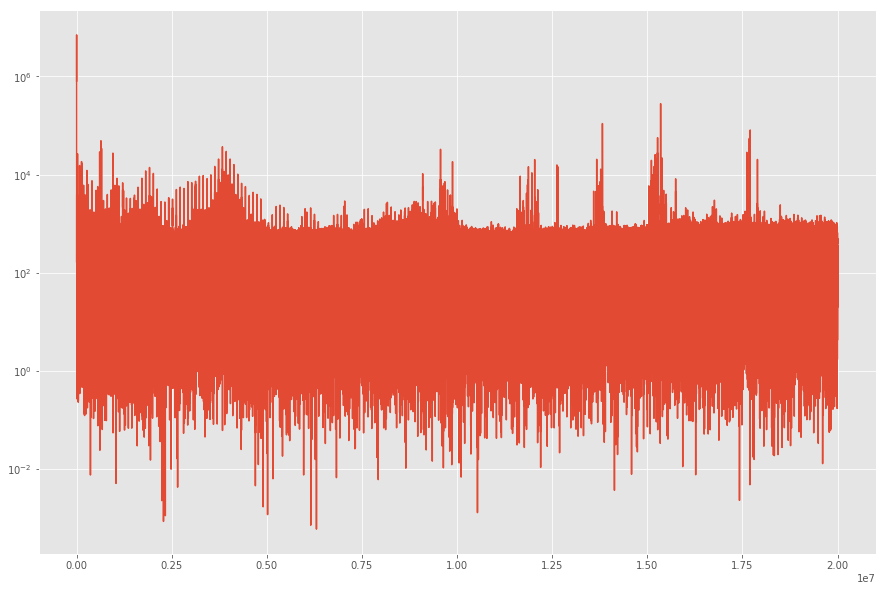

In [77]:
plt.semilogy(r_freq, power)

In [78]:
r_freq[power.argmax()]

50.0

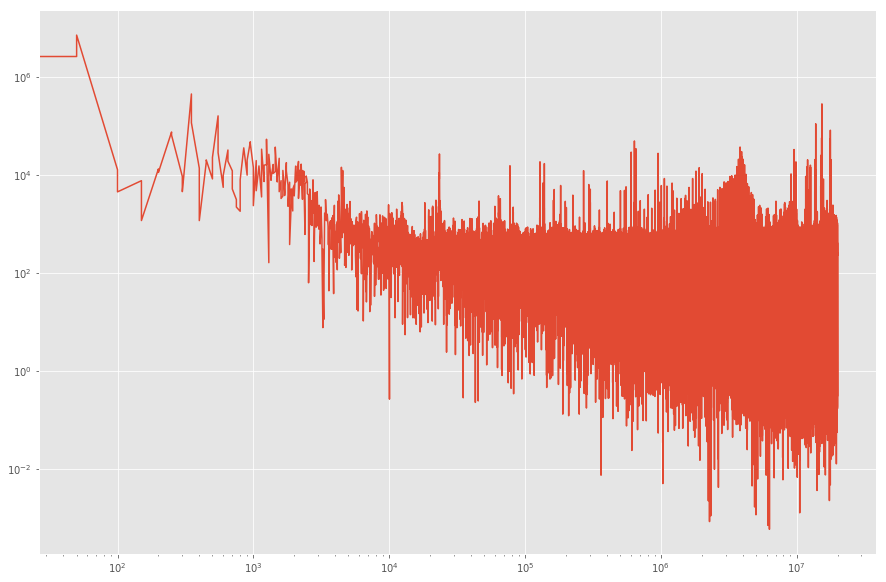

In [79]:
plt.loglog(r_freq, power)

# Phase Matching

## Zero Crossing

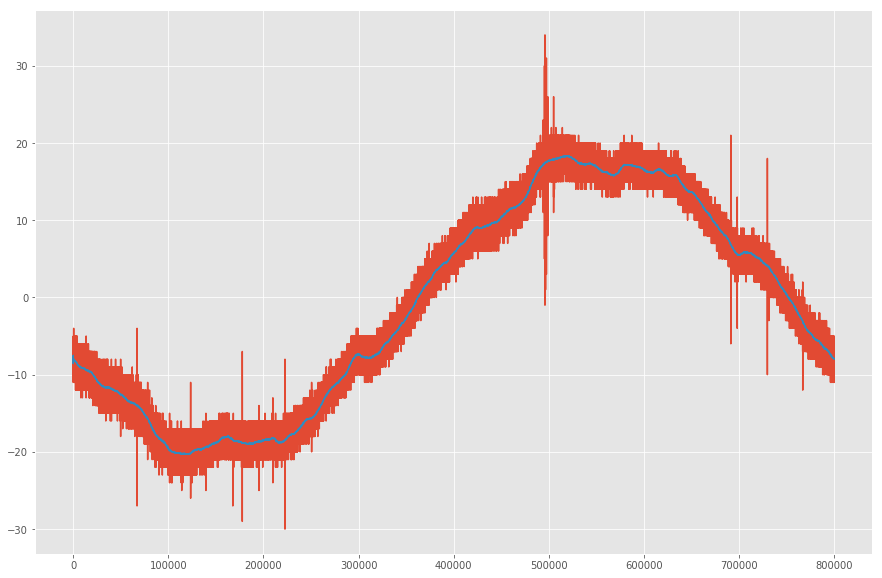

In [80]:
plt.plot(r_data)
plt.plot(r_data.ewm(alpha=0.001).mean())

(-2, 2)

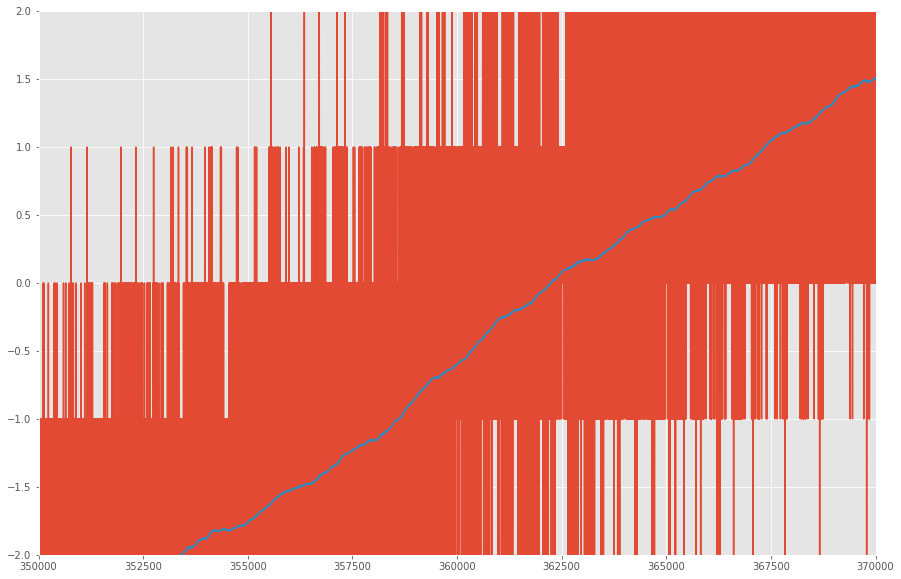

In [81]:
plt.plot(r_data)
plt.plot(r_data.ewm(alpha=0.001).mean())
plt.xlim([350000, 370000])
plt.ylim([-2, 2])

In [82]:
smoothed_data = r_data.ewm(alpha=0.001).mean()

In [83]:
np.where((smoothed_data[:-1].values * smoothed_data[1:].values) <= 0)

(array([362233, 751830]),)

In [84]:
smoothed_data[362233 - 1000]

-0.2308448602088526

In [85]:
smoothed_data[362233 + 1000]

0.16663454899844302

In [86]:
start = 362233

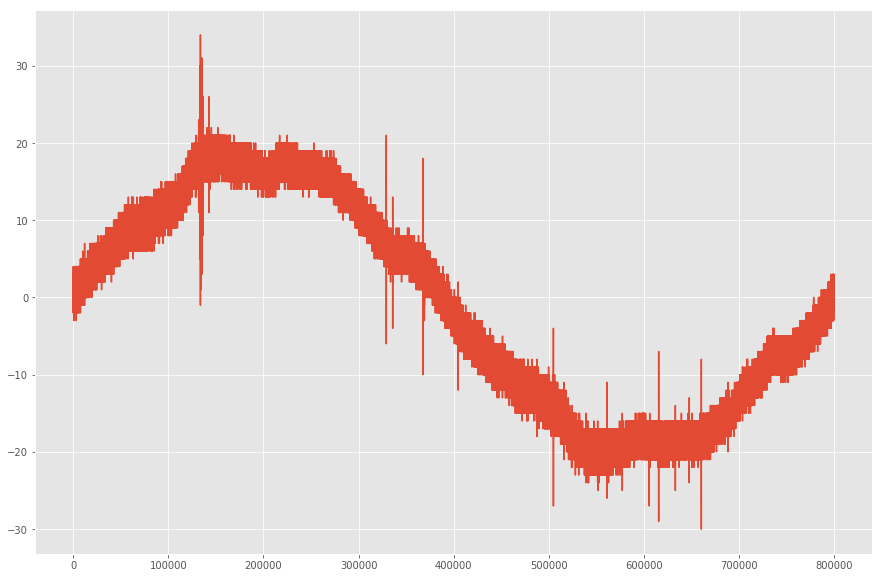

In [87]:
plt.plot(np.concatenate([r_data[start:], r_data[:start]]))

In [16]:
def shift_phase2zero(data):
    smoothed_data = data.ewm(alpha=0.001).mean()
    crossing_idx = np.where((smoothed_data[:-1].values *
                             smoothed_data[1:].values) <= 0)
    assert len(crossing_idx[0]) == 2
    for z_idx in crossing_idx[0]:
        if (smoothed_data[z_idx - 1000] < 0) and\
                (smoothed_data[z_idx + 1000] > 0):
            idx = z_idx
        else:
            pass
    return np.concatenate([data[idx:], data[:idx]])

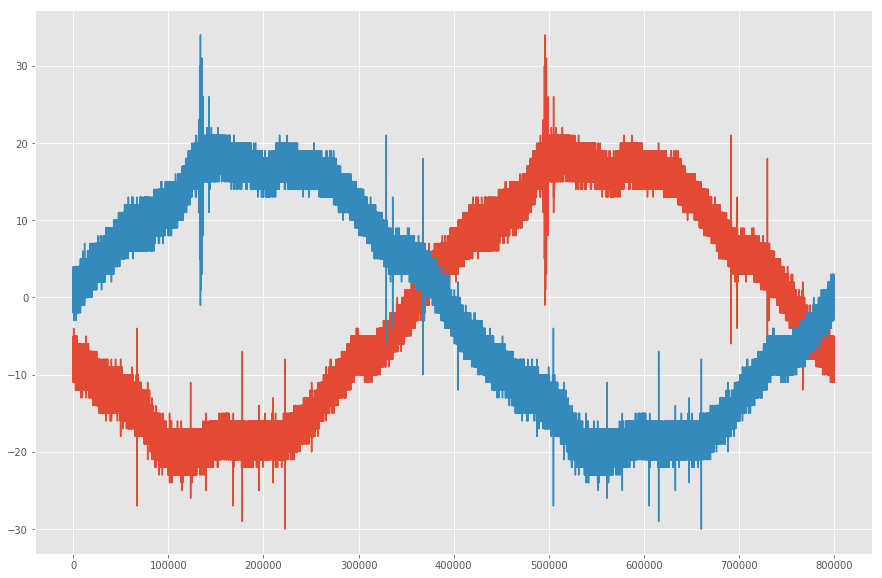

In [89]:
plt.plot(r_data)
plt.plot(shift_phase2zero(r_data))

# High Pass Filter

In [90]:
SAMPLING_RATE

40000000.0

In [13]:
from scipy.signal import butter

In [14]:
def high_pass_filter(signals, low_freq=1000, sample_fs=SAMPLING_RATE):
    # Fault pattern usually exists in high frequency band.
    # According to literature, the pattern is visible above 10^4 Hz.
    sos = butter(10, low_freq, btype='highpass', fs=sample_fs, output='sos')
    filtered_sig = signal.sosfilt(sos, signals)
    return filtered_sig

In [17]:
r_shifted = shift_phase2zero(r_data)

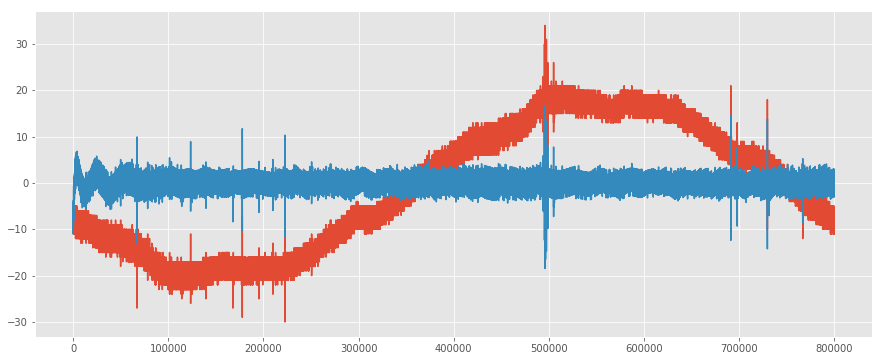

In [15]:
plt.plot(r_data)
plt.plot(high_pass_filter(r_data.values))

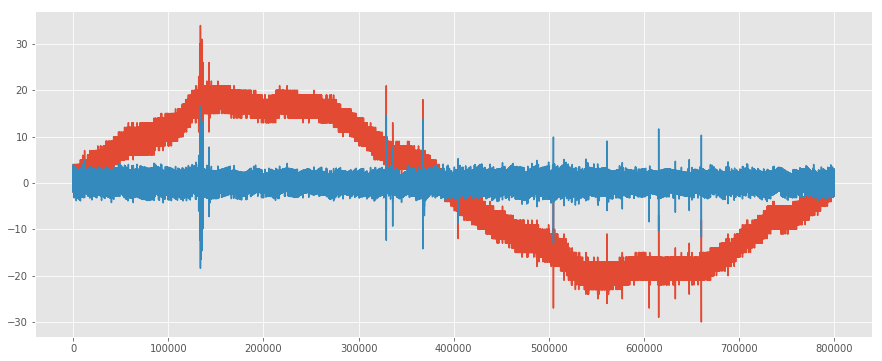

In [18]:
plt.plot(r_shifted)
plt.plot(high_pass_filter(r_shifted))

# DWT De-Noising

1. WaveletSmooth function based on [this post](http://connor-johnson.com/2016/01/24/using-pywavelets-to-remove-high-frequency-noise/)
2. Threshold equation and using hard mode in threshold as mentioned
    in section `3.2` *denoising based on optimized singular values* [from paper](http://dspace.vsb.cz/bitstream/handle/10084/133114/VAN431_FEI_P1807_1801V001_2018.pdf) 

In [22]:
import pywt
from statsmodels.robust import mad

In [23]:
def denoise_signal(x, wavelet='db4', level=1):

    # Decompose to get the wavelet coefficients
    coeff = pywt.wavedec(x, wavelet, mode="per")

    sigma = (1/0.6745) * mad(coeff[-level])
    # sigma = mad( coeff[-level] )

    # Calculte the univeral threshold
    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard')
                 for i in coeff[1:])

    # Reconstruct the signal using the thresholded coefficients
    return pywt.waverec(coeff, wavelet, mode='per')

/home/gokul/anaconda3/lib/python3.6/site-packages/pywt/_multilevel.py:148: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a = a[[slice(s) for s in d.shape]]


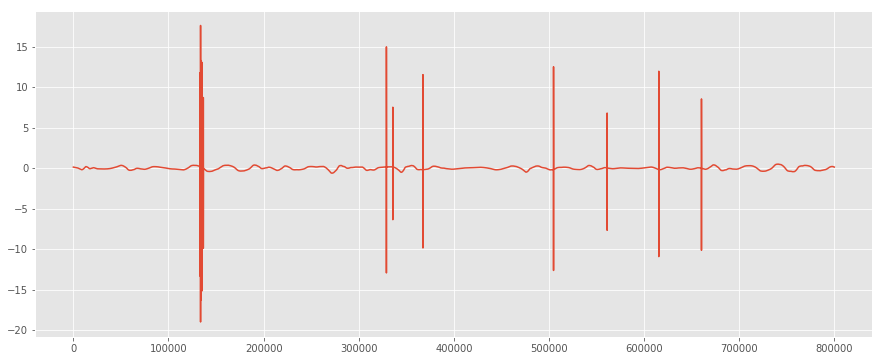

In [24]:
plt.plot(denoise_signal(high_pass_filter(r_shifted)))

Good Gyan read later: https://www.kaggle.com/residentmario/denoising-algorithms

# 